# Bibliotecas


In [146]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Criando o DataFrame

In [147]:
# Caminho para o arquivo CSV
caminho_arquivo = '/content/dados_notificacoes.csv'

# Criar DataFrame a partir do arquivo CSV
df = pd.read_csv(caminho_arquivo)

# Visualização do DataFrame
df.head()

,_id,municipio,dataNotificacao,estadoNotificacao,idade,tipoTeste,resultadoTeste,sintomas,sexo,dataPrimeiraDose
0,G7UdDp35Ow,Tio Hugo,2023-05-16T03:00:18.478Z,Rio Grande do Sul,20,TESTE RÁPIDO - ANTÍGENO,Reagente,"Coriza, Tosse, Dispneia, Dor de Garganta",Masculino,2021-09-09T03:00:00.000Z
1,yNCDdQwguJ,Pereiras,2023-05-16T03:00:34.545Z,São Paulo,49,TESTE RÁPIDO - ANTÍGENO,Não Reagente,Assintomático,Feminino,2021-04-12T03:00:00.000Z
2,sCxXchRDIz,São José do Rio Preto,2020-07-27T03:00:00.000Z,São Paulo,36,RT-PCR,Não detectável,"Outros, Dor de Garganta",Feminino,NaN
3,GGJcoXeZsT,São Bernardo do Campo,2023-05-16T03:00:12.846Z,São Paulo,50,TESTE RÁPIDO - ANTÍGENO,Não Reagente,"Dor de Cabeça, Tosse, Febre, Outros",Feminino,2021-06-25T03:00:00.000Z
4,AwLAQhNM8Q,Rosário do Sul,2023-05-16T03:00:35.808Z,Rio Grande do Sul,54,TESTE RÁPIDO - ANTÍGENO,Reagente,Assintomático,Feminino,NaN


Manipulando e analisando o DataFrame - **Início das perguntas**
# Qual o estado com a maior proporção de casos confirmados?



*RESPOSTA:* Nessa amostra, o estado com maior proporção é o **Mato Grosso**

---



In [148]:
# Filtrar apenas os registros com casos confirmados
confirmed_cases = df[df['resultadoTeste'] == 'Reagente']

# Calcular o número total de casos confirmados por estado
cases_by_state = confirmed_cases['estadoNotificacao'].value_counts()

# Calcular a proporção de casos confirmados em relação ao total de casos por estado
proportion_cases = cases_by_state / df['estadoNotificacao'].value_counts()

# Identificar o estado com a maior proporção de casos confirmados
state_with_highest_proportion = proportion_cases.idxmax()

# !!!RESPOSTA!!!
print("Estado com a maior proporção de casos confirmados:", state_with_highest_proportion)

Estado com a maior proporção de casos confirmados: Mato Grosso


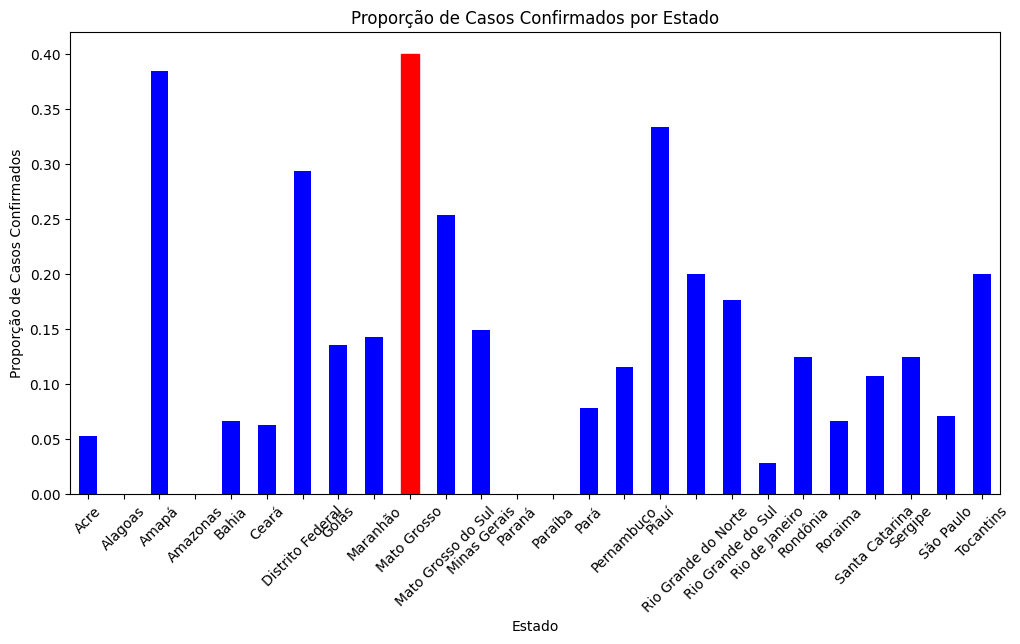

In [149]:
# Filtrar apenas os registros com casos confirmados
confirmed_cases = df[df['resultadoTeste'] == 'Reagente']

# Calcular o número total de casos confirmados por estado
cases_by_state = confirmed_cases['estadoNotificacao'].value_counts()

# Calcular a proporção de casos confirmados em relação ao total de casos por estado
proportion_cases = cases_by_state / df['estadoNotificacao'].value_counts()

# Identificar o estado com a maior proporção de casos confirmados
state_with_highest_proportion = proportion_cases.idxmax()

# Plotar o gráfico de barras com destaque para o estado com maior proporção
plt.figure(figsize=(12, 6))
proportion_cases.plot(kind='bar', color='blue')
plt.title('Proporção de Casos Confirmados por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporção de Casos Confirmados')

# Destacar a barra do estado com maior proporção
highlighted_color = 'red'
highlighted_index = proportion_cases.index.get_loc(state_with_highest_proportion)
plt.gca().get_children()[highlighted_index].set_color(highlighted_color)

plt.xticks(rotation=45)
plt.show()

#  Dentre os casos confirmados, qual a proporção de pacientes que receberam ao menos 1 dose de vacina?

*RESPOSTA:* Nessa amostra, a proporção é **62,42%**

---

In [162]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('dados_notificacoes.csv')

# Filtrar apenas os casos confirmados
confirmed_cases = df[df['resultadoTeste'] == 'Reagente']

# Calcular o número total de casos confirmados
total_confirmed_cases = len(confirmed_cases)

# Calcular a proporção de pacientes com pelo menos 1 dose de vacina
proportion_vaccinated = confirmed_cases[confirmed_cases['dataPrimeiraDose'].notna()]['dataPrimeiraDose'].count() / total_confirmed_cases

# !!!RESPOSTA!!!
print("Proporção de pacientes com pelo menos 1 dose de vacina entre os casos confirmados: {:.2f}%".format(proportion_vaccinated * 100))


Proporção de pacientes com pelo menos 1 dose de vacina entre os casos confirmados: 62.42%


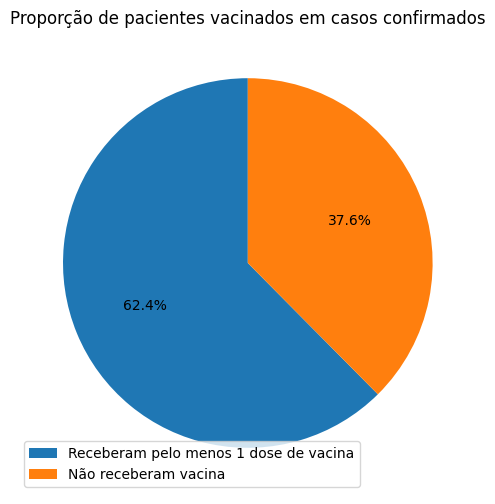

In [163]:
# Dados
sizes = [proportion_vaccinated, 1 - proportion_vaccinated]
colors = ['#1f77b4', '#ff7f0e']

# Plotagem do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)

# Adicionar legenda com índice das cores
plt.legend(labels, loc='best')

# Título do gráfico
plt.title('Proporção de pacientes vacinados em casos confirmados')

# Exibição do gráfico
plt.show()


# Como é a distribuição de idade entre pacientes sintomáticos e assintomáticos entre os casos confirmados?

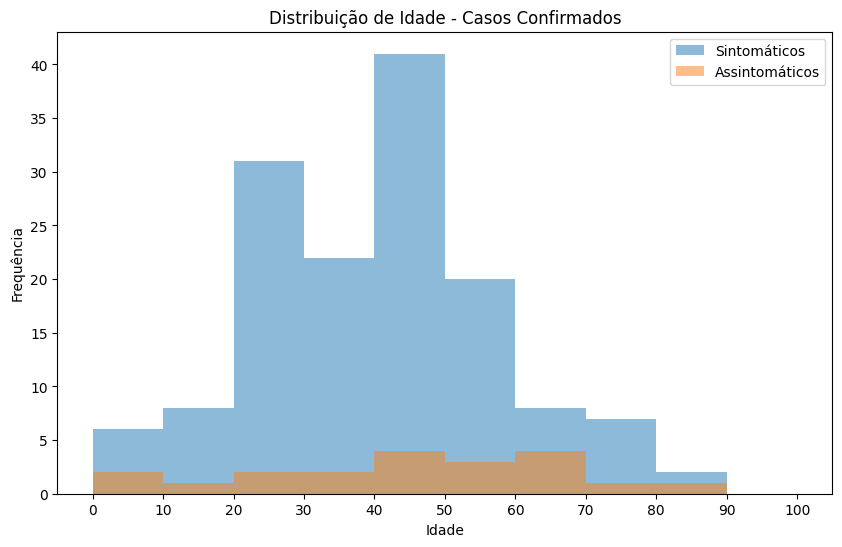

In [152]:
# Filtrar apenas os casos confirmados
confirmed_cases = df[df['resultadoTeste'] == 'Reagente']

# Filtrar os casos sintomáticos
symptomatic_cases = confirmed_cases[confirmed_cases['sintomas'] != 'Assintomático']

# Filtrar os casos assintomáticos
asymptomatic_cases = confirmed_cases[confirmed_cases['sintomas'] == 'Assintomático']

# Distribuição de idade para casos sintomáticos
symptomatic_age_distribution = symptomatic_cases['idade']

# Distribuição de idade para casos assintomáticos
asymptomatic_age_distribution = asymptomatic_cases['idade']

# Plotagem do histograma de idade para casos sintomáticos e assintomáticos
plt.figure(figsize=(10, 6))
plt.hist(symptomatic_age_distribution, bins=np.arange(0, 110, 10), alpha=0.5, label='Sintomáticos')
plt.hist(asymptomatic_age_distribution, bins=np.arange(0, 110, 10), alpha=0.5, label='Assintomáticos')

# Configurações do gráfico
plt.title('Distribuição de Idade - Casos Confirmados')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(np.arange(0, 110, 10))  # Definindo os ticks do eixo x em intervalos de 10 em 10
plt.legend()

# Exibição do gráfico
plt.show()



#  Para (pelo menos um) estados a sua escolha, construa uma visualização para acompanhar a evolução dos casos ao longo do período amostrado.

**Minas Gerais**

<ipython-input-153-f85f5a43834e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mg_cases['dataNotificacao'] = pd.to_datetime(mg_cases['dataNotificacao'])


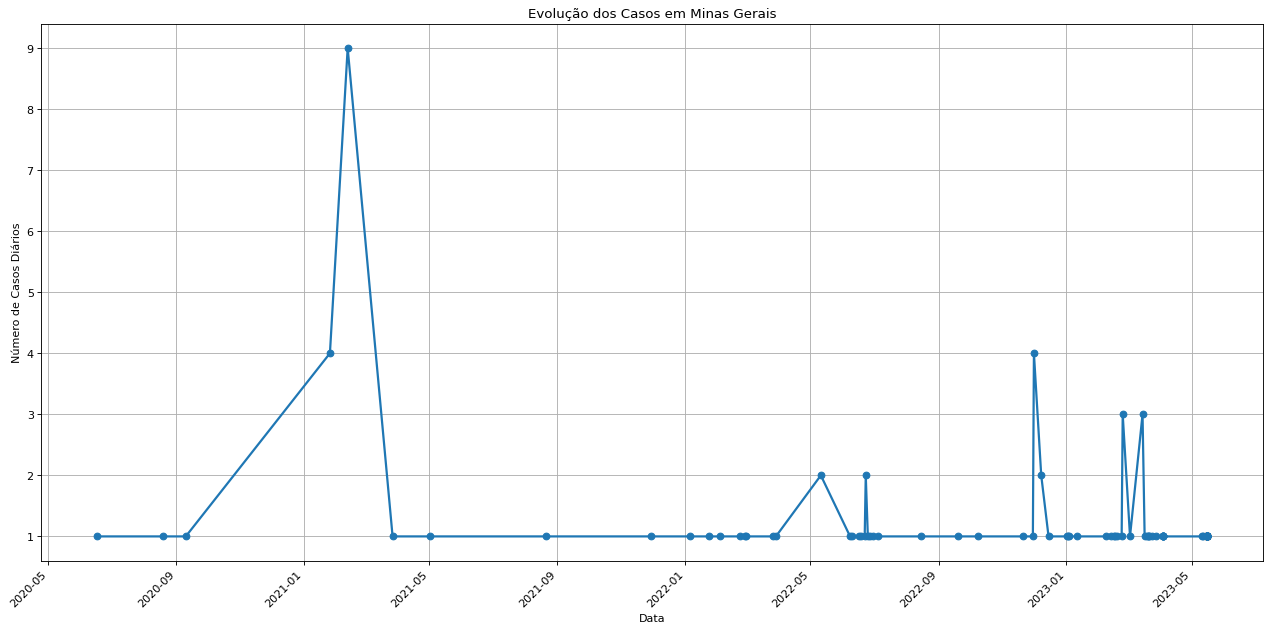

In [153]:
# Filtrar os casos do estado de Minas Gerais
mg_cases = df[df['estadoNotificacao'] == 'Minas Gerais']

# Converter a coluna 'dataNotificacao' para o tipo datetime
mg_cases['dataNotificacao'] = pd.to_datetime(mg_cases['dataNotificacao'])

# Agrupar os casos por data e contar o número de ocorrências
daily_cases = mg_cases['dataNotificacao'].value_counts().sort_index()

# Plotar o gráfico de evolução dos casos
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(daily_cases.index, daily_cases.values, marker='o', linestyle='-', linewidth=2)
plt.title('Evolução dos Casos em Minas Gerais')
plt.xlabel('Data')
plt.ylabel('Número de Casos Diários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [154]:
# Identificar o dia com o maior número de casos
max_cases_date = daily_cases.idxmax()
max_cases_count = daily_cases[max_cases_date]

# Imprimir a data e a quantidade de casos
print("Data com o maior número de casos em um único dia:", max_cases_date)
print("Quantidade de casos nesse dia:", max_cases_count)

Data com o maior número de casos em um único dia: 2021-02-12 03:00:00+00:00
Quantidade de casos nesse dia: 9


**----**

**Santa Catarina**

<ipython-input-171-8eeb700dccba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_cases['dataNotificacao'] = pd.to_datetime(sc_cases['dataNotificacao'])


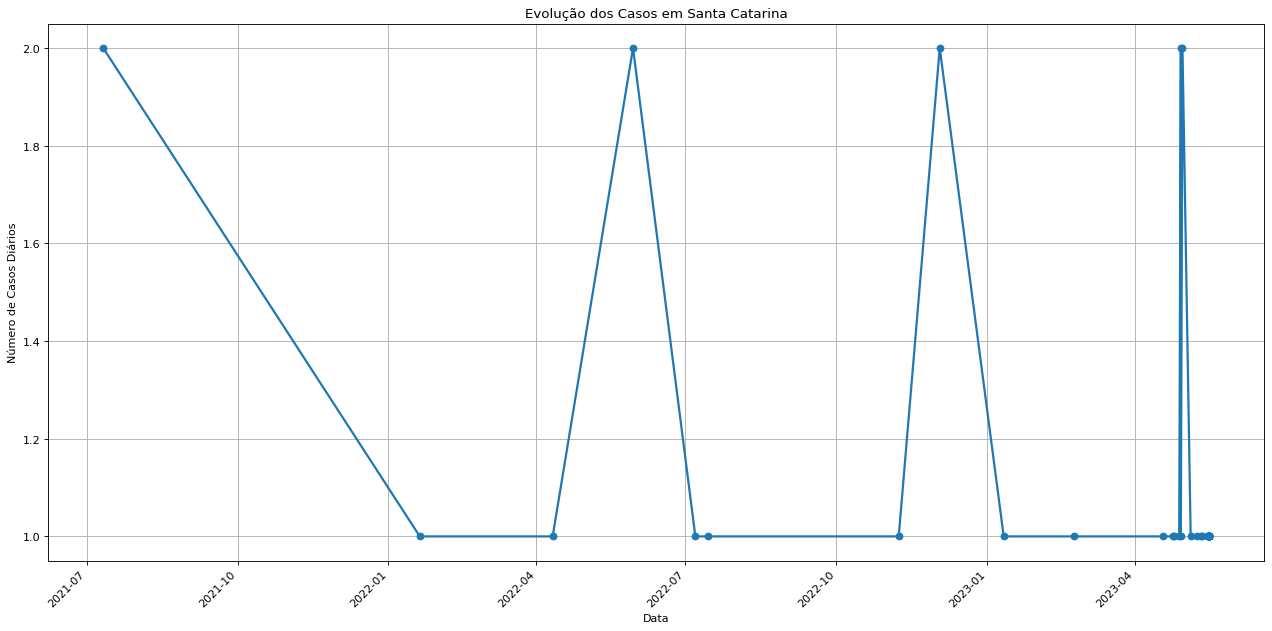

In [171]:
# Filtrar os casos do estado de Santa Catarina
sc_cases = df[df['estadoNotificacao'] == 'Santa Catarina']

# Converter a coluna 'dataNotificacao' para o tipo datetime
sc_cases['dataNotificacao'] = pd.to_datetime(sc_cases['dataNotificacao'])

# Agrupar os casos por data e contar o número de ocorrências
daily_cases = sc_cases['dataNotificacao'].value_counts().sort_index()

# Plotar o gráfico de evolução dos casos
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(daily_cases.index, daily_cases.values, marker='o', linestyle='-', linewidth=2)
plt.title('Evolução dos Casos em Santa Catarina')
plt.xlabel('Data')
plt.ylabel('Número de Casos Diários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [172]:
max_cases = daily_cases[daily_cases == daily_cases.max()]
max_cases_dates = max_cases.index.strftime('%Y-%m-%d').tolist()
max_cases_count = max_cases.values[0]

print("Dia(s) com o maior número de casos em um único dia:", max_cases_dates)
print("Quantidade de casos:", max_cases_count)


Dia(s) com o maior número de casos em um único dia: ['2021-07-11', '2022-05-30', '2022-12-03', '2023-04-29', '2023-04-30']
Quantidade de casos: 2


**----**

**Amazonas**

<ipython-input-157-e743acedfaf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am_cases['dataNotificacao'] = pd.to_datetime(am_cases['dataNotificacao'])


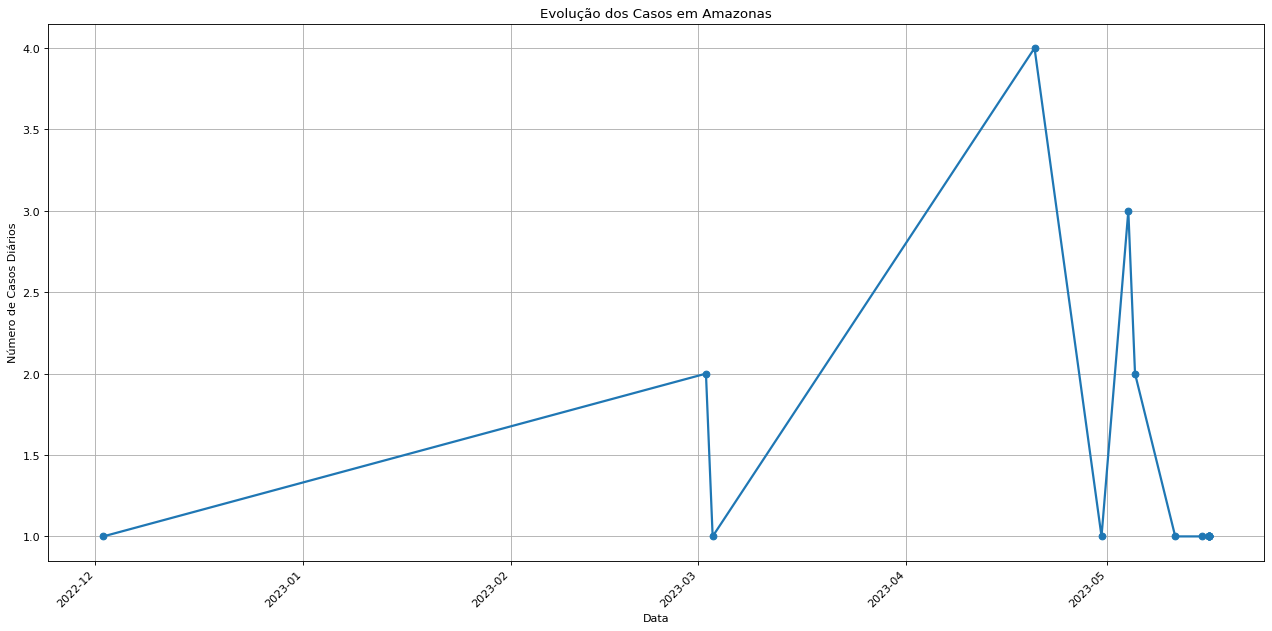

In [157]:
# Filtrar os casos do estado do Amazonas
am_cases = df[df['estadoNotificacao'] == 'Amazonas']

# Converter a coluna 'dataNotificacao' para o tipo datetime
am_cases['dataNotificacao'] = pd.to_datetime(am_cases['dataNotificacao'])

# Agrupar os casos por data e contar o número de ocorrências
daily_cases = am_cases['dataNotificacao'].value_counts().sort_index()

# Plotar o gráfico de evolução dos casos
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(daily_cases.index, daily_cases.values, marker='o', linestyle='-', linewidth=2)
plt.title('Evolução dos Casos em Amazonas')
plt.xlabel('Data')
plt.ylabel('Número de Casos Diários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [158]:
# Identificar o dia com o maior número de casos
max_cases_date = daily_cases.idxmax()
max_cases_count = daily_cases[max_cases_date]

# Imprimir a data e a quantidade de casos
print("Data com o maior número de casos em um único dia:", max_cases_date)
print("Quantidade de casos nesse dia:", max_cases_count)

Data com o maior número de casos em um único dia: 2023-04-20 04:00:00+00:00
Quantidade de casos nesse dia: 4


# Entre os pacientes sintomáticos, qual o sintoma mais frequente?

*RESPOSTA:* Nessa amostra, o sintoma mais frequente é **Tosse**

---

In [159]:
## Descobrindo o sintoma mais frequente

# Filtrar os casos confirmados sintomáticos
symptomatic_cases = confirmed_cases[confirmed_cases['sintomas'] != 'Assintomático']

# Criar uma lista de todos os sintomas individuais
all_symptoms = symptomatic_cases['sintomas'].str.split(', ')

# Contar a ocorrência de cada sintoma individual
symptom_counts = all_symptoms.explode().value_counts()

# Identificar o sintoma mais frequente
most_frequent_symptom = symptom_counts.idxmax()

# Imprimir o sintoma mais frequente
print("Sintoma mais frequente entre os pacientes sintomáticos:", most_frequent_symptom)

Sintoma mais frequente entre os pacientes sintomáticos: Tosse


In [176]:
# Filtrar os casos sintomáticos
symptomatic_cases = df[df['sintomas'] != 'Assintomático']

# Contar a frequência da tosse
cough_count = symptomatic_cases['sintomas'].str.contains('Tosse').sum()

# Imprimir a quantidade de vezes em que a tosse aparece
print("Quantidade de vezes em que a tosse aparece:", cough_count)


Quantidade de vezes em que a tosse aparece: 762


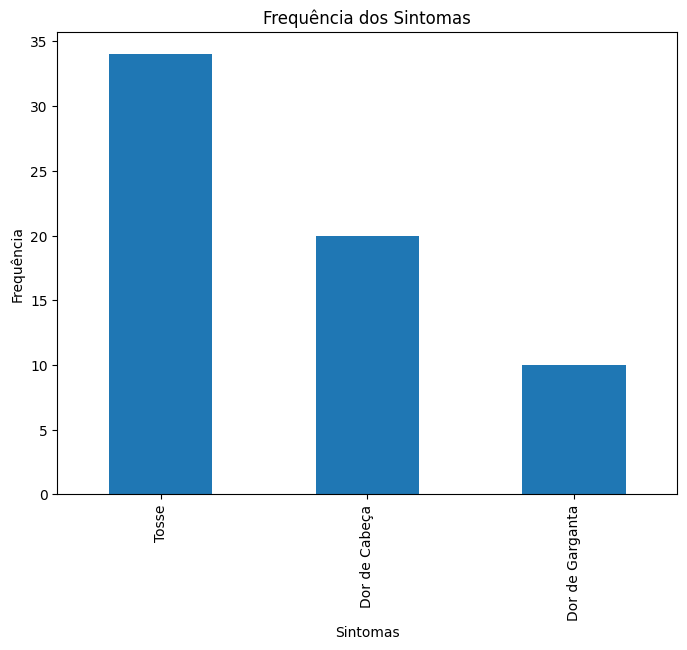

In [179]:
# Filtrar os casos sintomáticos que contêm os sintomas de interesse
symptoms_of_interest = ['Tosse', 'Dor de Cabeça', 'Dor de Garganta']
filtered_cases = symptomatic_cases[symptomatic_cases['sintomas'].isin(symptoms_of_interest)]

# Contar a frequência de cada sintoma
symptoms_frequency = filtered_cases['sintomas'].value_counts()

# Plotar o gráfico de barras comparando a frequência dos sintomas
plt.figure(figsize=(8, 6))
symptoms_frequency.plot(kind='bar')
plt.title('Frequência dos Sintomas')
plt.xlabel('Sintomas')
plt.ylabel('Frequência')
plt.show()


In [160]:
## Descobrindo a combinação de sintoma mais frequente

# Filtrar os casos confirmados sintomáticos
symptomatic_cases = confirmed_cases[confirmed_cases['sintomas'] != 'Assintomático']

# Obter a contagem de ocorrência de cada sintoma
symptom_counts = symptomatic_cases['sintomas'].value_counts()

# Identificar o sintoma mais frequente
most_frequent_symptom = symptom_counts.idxmax()

# Imprimir o sintoma mais frequente
print("A combinação de sintomas mais frequente entre os pacientes sintomáticos:", most_frequent_symptom)


A combinação de sintomas mais frequente entre os pacientes sintomáticos: Tosse, Dor de Garganta
